## What is Principal Component Analysis?
- statistical procedure that uses an orthogonal transformation that converts a set of correlated variables to a set of uncorrelated variables.PCA is the most widely used tool in exploratory data analysis and in machine learning for predictive models.
- Underlying assumptions : data must be linear
- Causes overfitting
- Information loss
- Sensitive to data scaling
- Hard interpretation since the data conversion


### 1. PCA Usage
- is an unsupervised learning algorithm technique used to examine the interrelations among a set of variables. It is also known as a general factor analysis where regression determines a line of best fit.
- to reduce the dimensionality of a dataset while preserving the most important patterns or relationships between the variables without any prior knowledge of the target variables.
- data visualization, feature selection, data compression
- Noise Reduction and colinearity
- Outlier detection
### 2. Math Procedure
1) Standardize dataset (mu = 1 sd = 0)
- Center the Data Mean Subtraction: Start by subtracting the mean of each feature from the data. This centers the data around the origin, making it easier to identify the directions of maximum variance.
-   $ Z = \frac{X-\mu}{\sigma} $
2) Covariance to find variability : cov(x1,x2) = $ \frac{\sum_{i=1}^{n}(x1_i-x1)(x2_i-x2)}{n-1} $
3) Compute Eigenvalues an Eigenvectors
- The directions of maximum variance (principal components) are found by calculating the eigenvectors (directions) and eigenvalues (amount of variance in those directions) of the covariance matrix.
- nxn matrix (square) and X be non-zero vector
- AX = $\lambda $ X
- (A-$\lambda I$)X = 0
- |A-$\lambda I$| = 0

4) Choose the Top Components
- Sort the eigenvalues in descending order, and choose the top ones. The corresponding eigenvectors are the directions that capture the most variance.
Dimensionality Reduction: Use these top principal components to transform your data into a new, lower-dimensional space.

5) Transform the Data
- Project Data: Finally, project your original data onto the selected principal components. This gives you a new dataset with fewer dimensions, where each dimension is a linear combination of the original features. 
<div>
<img src="pca.png" width="700">
</div>



- Reference Link : https://www.geeksforgeeks.org/principal-component-analysis-pca/

In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53)['data']['original']
  
# data (as pandas dataframes) 
X = iris[[i for i in iris.columns if i not in ['class']]]
y = iris['class']

In [8]:
import pandas as pd
import numpy as np

In [9]:
# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std

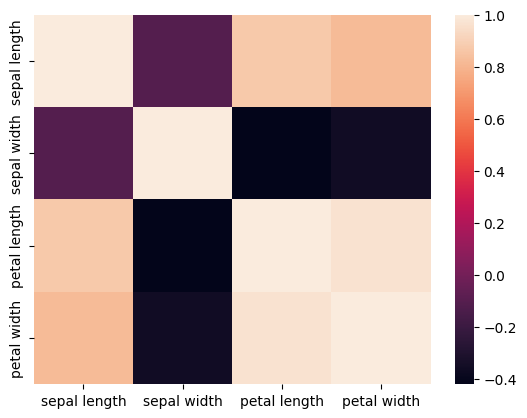

In [11]:
# covariance
c = Z.cov()

# Plot the covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()

In [12]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [2.91081808 0.92122093 0.14735328 0.02060771]
Eigen values Shape: (4,)
Eigen Vector Shape: (4, 4)


In [14]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

In [22]:
n_components = np.argmax(explained_var >= 0.90) + 1
n_components

2

In [23]:
eigenvectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [27]:
u

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

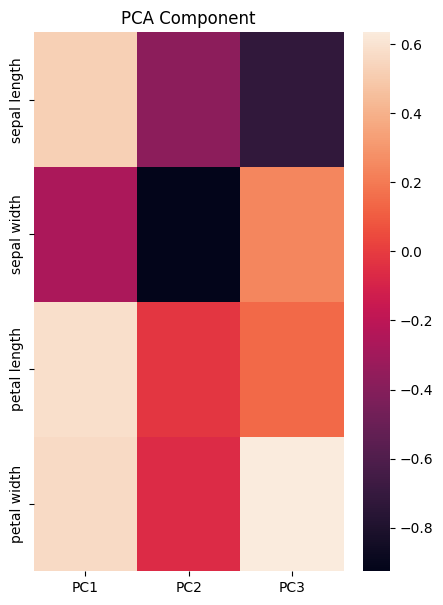

In [37]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components+1]
pca_component = pd.DataFrame(u,
                             index = X.columns,
                             columns = ['PC1','PC2','PC3']
                            )

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

In [38]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
# Print the  Pricipal Component values
print(Z_pca)

         PCA1      PCA2       PC3
0   -2.256981 -0.504015 -0.121536
1   -2.079459  0.653216 -0.226492
2   -2.360044  0.317414  0.051308
3   -2.296504  0.573447  0.098530
4   -2.380802 -0.672514  0.021356
..        ...       ...       ...
145  1.864277 -0.381544  0.253682
146  1.553288  0.902291 -0.025297
147  1.515767 -0.265904  0.178679
148  1.371796 -1.012968  0.928295
149  0.956096  0.022210  0.527029

[150 rows x 3 columns]


In [39]:
pca_component

,PC1,PC2,PC3
sepal length,0.522372,-0.372318,-0.721017
sepal width,-0.263355,-0.925556,0.242033
petal length,0.581254,-0.021095,0.140892
petal width,0.565611,-0.065416,0.633801
